<a href="https://colab.research.google.com/github/lilianaochoae/VENTAS_FARMACEUTICAS_ATC/blob/main/02.2_DIAS_VENTAS_FARMACEUTICAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTACIÓN DE LIBRERÍA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

CARGADE BASE DE DATOS

In [2]:
columns_dtypes = {'Weekday Name' : 'category',
                  'M01AB' : 'category',
                  'M01AE' : 'category',
                  'N02BA' : 'category',
                  'N02BE' : 'category',
                  'N05B' : 'category',
                  'N05C' : 'category',
                  'R03' : 'category',
                  'R06' : 'category'}

In [3]:
Bd = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRbpAyoTB5vVUpq3WEERXzqKIFDVcK6Y9cgCnOyPIHaknKtxmcJXGHszgr2RFhxtLjP1T59DRsAyzUt/pub?output=csv')

In [4]:
print (Bd.shape)

(2106, 12)


PORCENTAJE DE VALORES FALTANTES EN COLUMNAS

In [5]:
k = Bd.isna().sum()
((round(k[k!=0]/Bd.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k[k!=0]))], sep='%')

Series([], dtype: object)

In [6]:
base = Bd

LIMPIEZA DE LOS DATOS

In [7]:
#HotEncoding en la variable Weekday Name
dummy_WeekdayName = pd.get_dummies(Bd["Weekday Name"], prefix = "Weekday Name")
dummy_WeekdayName.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["Weekday Name"], axis = 1)
Bd = pd.concat([Bd,dummy_WeekdayName], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,dia,mes,año,Weekday Name_Friday,Weekday Name_Monday,Weekday Name_Saturday,Weekday Name_Sunday,Weekday Name_Thursday,Weekday Name_Tuesday,Weekday Name_Wednesday
0,0.0,3.67,44654.0,32.40,7.0,0.0,0.0,2.0,2,1,2014,0,0,0,0,1,0,0
1,8.0,4.00,44655.0,50.60,16.0,0.0,20.0,4.0,3,1,2014,1,0,0,0,0,0,0
2,2.0,1.00,44687.0,61.85,10.0,0.0,9.0,1.0,4,1,2014,0,0,1,0,0,0,0
3,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,5,1,2014,0,0,0,1,0,0,0
4,5.0,1.00,44685.0,44763.00,16.0,2.0,6.0,2.0,6,1,2014,0,1,0,0,0,0,0


In [8]:
#HotEncoding en la variable DIA
dummy_dia = pd.get_dummies(Bd["dia"], prefix = "dia")
dummy_dia.head()

#Agregar el HotEncoding de DIA a la BD
Bd = Bd.drop(["dia"], axis = 1)
Bd = pd.concat([Bd,dummy_dia], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,mes,año,...,dia_22,dia_23,dia_24,dia_25,dia_26,dia_27,dia_28,dia_29,dia_30,dia_31
0,0.0,3.67,44654.0,32.40,7.0,0.0,0.0,2.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
1,8.0,4.00,44655.0,50.60,16.0,0.0,20.0,4.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.00,44687.0,61.85,10.0,0.0,9.0,1.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,1,2014,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1.00,44685.0,44763.00,16.0,2.0,6.0,2.0,1,2014,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#HotEncoding en la variable mes	
dummy_mes	= pd.get_dummies(Bd["mes"], prefix = "mes")
dummy_mes.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["mes"], axis = 1)
Bd = pd.concat([Bd,dummy_mes], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,año,Weekday Name_Friday,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
0,0.0,3.67,44654.0,32.40,7.0,0.0,0.0,2.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,4.00,44655.0,50.60,16.0,0.0,20.0,4.0,2014,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1.00,44687.0,61.85,10.0,0.0,9.0,1.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,0,...,0,0,0,0,0,0,0,0,0,0
4,5.0,1.00,44685.0,44763.00,16.0,2.0,6.0,2.0,2014,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#HotEncoding en la variable año	
dummy_año	= pd.get_dummies(Bd["año"], prefix = "año")
dummy_año.head()

#Agregar el HotEncoding de mes a la BD
Bd = Bd.drop(["año"], axis = 1)
Bd = pd.concat([Bd,dummy_año], axis = 1)
Bd.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Weekday Name_Friday,Weekday Name_Monday,...,mes_9,mes_10,mes_11,mes_12,año_2014,año_2015,año_2016,año_2017,año_2018,año_2019
0,0.0,3.67,44654.0,32.40,7.0,0.0,0.0,2.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,8.0,4.00,44655.0,50.60,16.0,0.0,20.0,4.0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1.00,44687.0,61.85,10.0,0.0,9.0,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,5.0,1.00,44685.0,44763.00,16.0,2.0,6.0,2.0,0,1,...,0,0,0,0,1,0,0,0,0,0


VALIDACIÓN DE DATOS

Generalmente, cuando trabajemos con algoritmos de clustering, dado que son algoritmos basados en distancias, va a ser fundamental escalar los datos para prescindir de las unidades de medida de las diferentes features. A continuación, escalamos los datos numéricos:

In [11]:
from sklearn.preprocessing import scale, MinMaxScaler

# scale
scaled_1 = scale(Bd)

# MinMaxScaler
scaler = MinMaxScaler()
scaled_2 = scaler.fit_transform(Bd)

# Muestro las primeras 5 filas escaladas con scale
print("Escalado con scale:")
print(scaled_1[1:6,])

# Muestro las primeras 5 filas escaladas con Min-Max
print("\nEscalado con Min-Max:")
print(scaled_2[1:6,])

Escalado con scale:
[[-0.09971192 -0.09713608 -0.10036297 -0.09456012 -0.08186252 -0.07381669
  -0.08730028 -0.09429708  2.4488115  -0.40836136 -0.40836136 -0.40836136
  -0.40836136 -0.40836136 -0.40756957 -0.18404712 -0.18542152  5.39311731
  -0.18542152 -0.18542152 -0.18542152 -0.18542152 -0.18542152 -0.18404712
  -0.18404712 -0.18404712 -0.18404712 -0.18404712 -0.18404712 -0.18404712
  -0.18404712 -0.18404712 -0.18404712 -0.18404712 -0.18404712 -0.18404712
  -0.18404712 -0.18404712 -0.18404712 -0.18404712 -0.18404712 -0.18404712
  -0.18404712 -0.17703622 -0.17560468 -0.13914411  3.2223879  -0.29537827
  -0.31124749 -0.30570892 -0.31124749 -0.30570892 -0.31124749 -0.31124749
  -0.30570892 -0.28963924 -0.27692439 -0.28186244  2.18762755 -0.45787512
  -0.45863365 -0.45787512 -0.45787512 -0.39239343]
 [-0.09971193 -0.09713609 -0.10036292 -0.0945601  -0.08186253 -0.07381669
  -0.0873003  -0.09429709 -0.40836136 -0.40836136  2.4488115  -0.40836136
  -0.40836136 -0.40836136 -0.40756957 -0.

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


ALGORITMO K-MEANS

In [12]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=6, random_state=0
)

In [13]:
y_km = km.fit_predict(scaled_1)

In [14]:
print(y_km)

[0 0 0 ... 0 0 0]


GRAFICAR

Para graficar los clústeres, utilizamos Matplotlib. La mejor forma de ver como se comportan los datos es con un gráfico de dispersión (scatter)

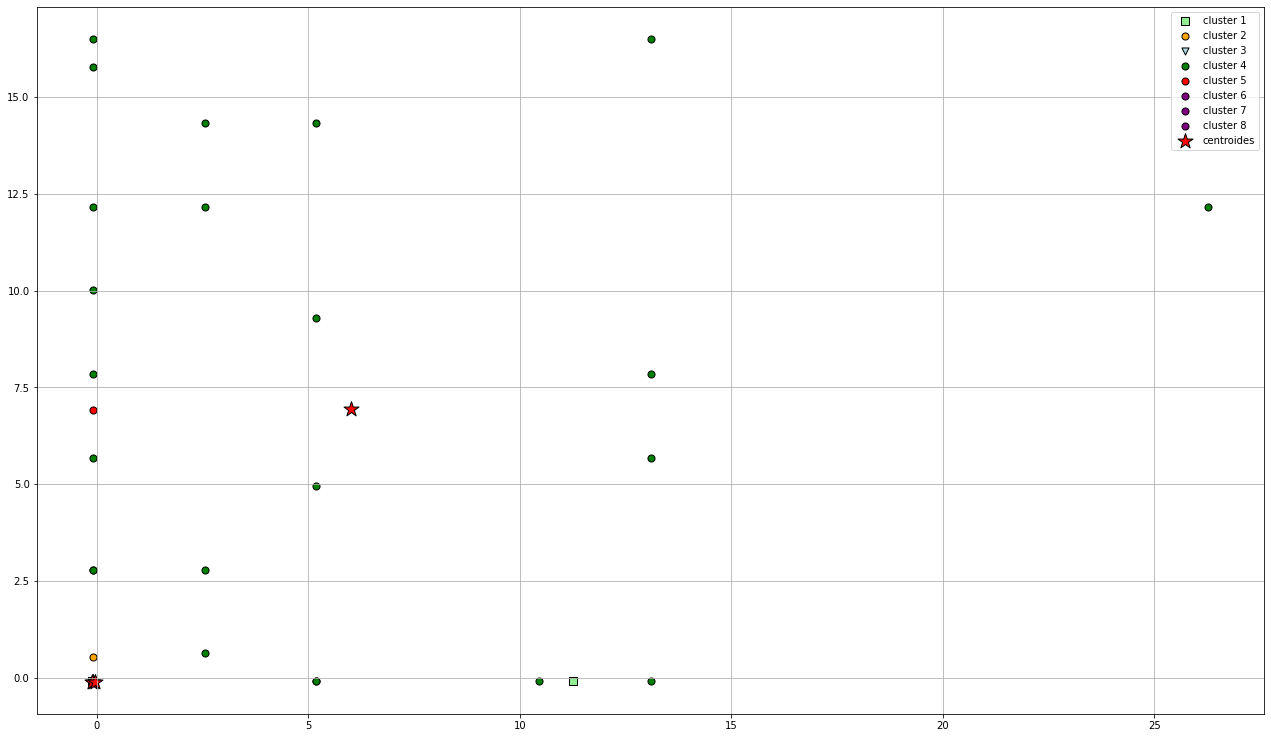

In [15]:
import matplotlib.pyplot as plt

#configuro el tamaño del grafico final
plt.figure(figsize=(22,13))

#scatter del primer cluster
plt.scatter(
    scaled_1[y_km == 2, 0], scaled_1[y_km == 2, 3],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
#scatter del segundo cluster
plt.scatter(
    scaled_1[y_km == 1, 6], scaled_1[y_km == 1, 2],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
#scatter del tercer cluster
plt.scatter(
    scaled_1[y_km == 4, 7], scaled_1[y_km == 4, 7],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
#scatter del cuarto cluster
plt.scatter(
    scaled_1[y_km == 3, 5], scaled_1[y_km == 3, 6],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='cluster 4'
)
#scatter del quinto cluster
plt.scatter(
    scaled_1[y_km == 1, 3], scaled_1[y_km == 1, 4],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 5'
)
#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 4, 6], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 6'
)

#scatter del septimo cluster
plt.scatter(
    scaled_1[y_km == 6, 4], scaled_1[y_km == 4, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 7'
)

#scatter del sexto cluster
plt.scatter(
    scaled_1[y_km == 6, 1], scaled_1[y_km == 5, 6],
    s=50, c='purple',
    marker='o', edgecolor='black',
    label='cluster 8'
)


#scatter del los centroides
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroides'
)
#le pongo la leyenda
plt.legend(scatterpoints=1)
#hace una grilla en el grafico
plt.grid()
#lo imprime en pantalla
plt.show()

MÉTRICAS DE EVALUACIÓN


El método de Elbow consiste básicamente en verificar la evolución de la suma de los cuadrados del error para varios valores de K y verificar cual es el que brinda un mejor agrupamiento.

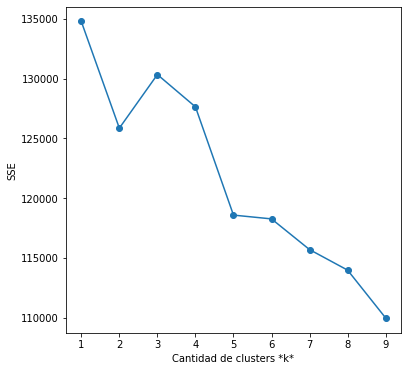

In [16]:
# Se corre el algoritmo con K entre 2 y 10 y se va guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled_1)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters *k*')
plt.ylabel('SSE');

In [17]:
clases = km.labels_

In [18]:
clases.shape

(2106,)

In [19]:
print(clases)

[3 3 3 ... 8 8 8]


ALGORITMO DE CLASIFICACIÓN

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
datos_Bd_variables = Bd

In [22]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(datos_Bd_variables, clases, random_state=1)

In [23]:
print("Tamaño de los datos de entrenamiento = ", X_entrenamiento.shape)
print("Tamaño de los datos de prueba = ", X_prueba.shape)
print("Tamaño del vector de clases de entrenamiento = " , y_entrenamiento.shape)
print("Tamaño del vector de clases de prueba = ", y_prueba.shape)

Tamaño de los datos de entrenamiento =  (1579, 64)
Tamaño de los datos de prueba =  (527, 64)
Tamaño del vector de clases de entrenamiento =  (1579,)
Tamaño del vector de clases de prueba =  (527,)


In [24]:
# Cargar librerias
from sklearn.ensemble import AdaBoostClassifier
# Importar Clasificador de Vector de Soporte
from sklearn.svm import SVC
# Importar métricas scikit-learn para calculos exactos
from sklearn import metrics

In [25]:
# Crear clasificador base
svc = SVC(probability=True, kernel='linear')

# Crear objeto de clasificación AdaBoost
abc = AdaBoostClassifier(n_estimators=2500,learning_rate=0.001)

# Clasificador de entrenamiento AdaBoost
model = abc.fit(X_entrenamiento, y_entrenamiento)

# Predicción de la respuesta para la bd de prueba
y_pred = model.predict(X_prueba)

# Exactitud del modelo, qué tan correcto es el clasificador?
print("Accuracy:",metrics.accuracy_score(y_prueba, y_pred))

Accuracy: 0.9886148007590133
